In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import json
import datetime

### gist   
enter refdes, stream and paramater   
m2m request for deployment info   
m2m request for data   
calculate offset using +/- 24 hours of data and plot for comparison   
apply offset and plot for result comparison   

In [68]:
username ='OOIAPI-30AZZ33CYL06XZ'
token = '77CEUHU3VZ9'
refdes = 'CE04OSPS-PC01B-4A-CTDPFA109'
delivery_method = 'streamed'
stream = 'ctdpf_optode_sample'
parameter = 'seawater_pressure'
data_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'
asset_url = 'https://ooinet.oceanobservatories.org/api/m2m/12587/events/deployment/inv/'

In [69]:
sub_site = refdes[:8]
platform = refdes[9:14]
instrument = refdes[15:]
asset_url_inputs = '/'.join((sub_site, platform, instrument))

In [70]:
r = requests.get(asset_url+asset_url_inputs+'/-1',auth=(username, token))
asset_info = r.json()
# print json.dumps(r.json(), indent=2)


In [71]:
print refdes, 'has the following deployments:\n'

for i in range(len(asset_info)):
    start = asset_info[i]['eventStartTime']
    end = asset_info[i]['eventStopTime']
    
    try:
        print \
        'deployment', asset_info[i]['deploymentNumber'], \
        'uid', asset_info[i]['sensor']['uid'], \
        'start_time', datetime.datetime.utcfromtimestamp(start/1000.0).strftime('%Y-%m-%d %H:%M:%S'), \
        'end_time', datetime.datetime.utcfromtimestamp(end/1000.0).strftime('%Y-%m-%d %H:%M:%S')
    except:
        print "present"
    

CE04OSPS-PC01B-4A-CTDPFA109 has the following deployments:

deployment 1 uid ATAPL-66662-00009 start_time 2014-08-30 09:16:00 end_time 2015-08-02 00:00:00
deployment 2 uid ATOSU-66662-00014 start_time 2015-08-03 05:41:00 end_time 2016-07-18 00:00:00
deployment 3 uid ATOSU-66662-00006 start_time 2016-07-19 08:00:00 end_time 2017-07-28 00:00:00
deployment 4 uid ATOSU-66662-00014 start_time 2017-07-29 05:00:00 end_time present


In [72]:
'''
take the end time - 48 hour average
take the begin time from next + 48 hour average
subtract endtime average from begin time average
list as the offset
plot accross both
'''

'\ntake the end time - 48 hour average\ntake the begin time from next + 48 hour average\nsubtract endtime average from begin time average\nlist as the offset\nplot accross both\n'

In [73]:
start_times = []
start_times_plus = []
end_times = []
end_times_minus = []


for i in range(len(asset_info)):
    start = asset_info[i]['eventStartTime']
    end = asset_info[i]['eventStopTime']
    
    try:
        start_times.append(datetime.datetime.utcfromtimestamp(start/1000.0).strftime('%Y-%m-%dT%H:%M:%S.000Z'))
        end_times.append(datetime.datetime.utcfromtimestamp(end/1000.0).strftime('%Y-%m-%dT%H:%M:%S.000Z'))
    except:
        pass
    
    try:
        start_times_plus.append((datetime.datetime.utcfromtimestamp(start/1000.0) \
                      + datetime.timedelta(seconds=172800)).strftime('%Y-%m-%dT%H:%M:%S.000Z'))
        end_times_minus.append((datetime.datetime.utcfromtimestamp(end/1000.0) \
                    - datetime.timedelta(seconds=172800)).strftime('%Y-%m-%dT%H:%M:%S.000Z'))
    except:
        pass        
        
    
#     try:
#         starts.append(datetime.datetime.utcfromtimestamp(start/1000.0).strftime('%Y-%m-%dT%H:%M:%S.000Z'))
#         ends.append(datetime.datetime.utcfromtimestamp(end/1000.0).strftime('%Y-%m-%dT%H:%M:%S.000Z'))
    


In [74]:
'''
take first end time and second start time
first end time becomes the begin time of the request
second start time becomes the end time of the request

request before and after chunk
'''

'\ntake first end time and second start time\nfirst end time becomes the begin time of the request\nsecond start time becomes the end time of the request\n'

In [75]:
for i in range(len(end_times)):
    request_begin_time = end_times_minus[i]
    request_end_time = end_times[i]


In [76]:
request_begin_time = end_times_minus[1]
request_end_time = start_times_plus[2]

In [77]:
end_times_minus[1]

'2016-07-16T00:00:00.000Z'

In [78]:
start_times_plus[2]

'2016-07-21T08:00:00.000Z'

In [79]:
print start_times
print end_times

['2014-08-30T09:16:00.000Z', '2015-08-03T05:41:00.000Z', '2016-07-19T08:00:00.000Z', '2017-07-29T05:00:00.000Z']
['2015-08-02T00:00:00.000Z', '2016-07-18T00:00:00.000Z', '2017-07-28T00:00:00.000Z']


In [64]:
print start_times_plus
print end_times_minus

['2014-09-01T09:16:00.000Z', '2015-08-05T05:41:00.000Z', '2016-07-21T08:00:00.000Z', '2017-07-31T05:00:00.000Z']
['2015-07-31T00:00:00.000Z', '2016-07-16T00:00:00.000Z', '2017-07-26T00:00:00.000Z']


In [65]:
data_url_inputs = '/'.join((sub_site, platform, instrument, delivery_method, stream))
r = requests.get(data_url+\
                 data_url_inputs+\
                 '?beginDT='+\
                 request_begin_time+\
                 '&endDT='+\
                 request_end_time+\
                 '&limit=1000',\
                 auth=(username, token))

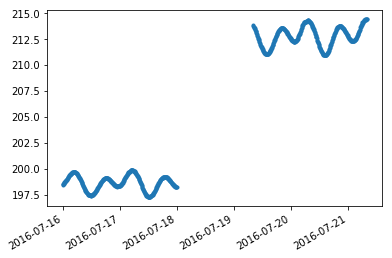

In [66]:
data = r.json()

def extract_keys(data, keys):
    rdict = {key: [] for key in keys}
    for record in data:
        for key in keys:
            rdict[key].append(record[key])
    return rdict

data = extract_keys(data, ['time', parameter])

ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

x = []
for i in data['time']:
    x.append(ntp_seconds_to_datetime(i))

y = data[parameter]

fig, ax = plt.subplots()
ax.plot(x,y, '.')
fig.autofmt_xdate()